In [122]:
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs
import re
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import recall_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
plt.style.use('ggplot')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
plt.rcParams["figure.figsize"] = (12,12)
plt.rcParams.update({'font.size': 16})
pd.options.display.max_columns = None
pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [123]:
from models import *

In [124]:
df = get_data('EUR_USD_M15', datetime(2017,1,1), datetime(2018,1,1))
print('got data')
df = add_target(df)
print('added targets')
df = add_features(df)
print('added features')
x, y, last_x_pred, last_x_ohlcv = split_data_x_y(df)

got data
added targets
added features


In [125]:
print(df.shape)
print(x.shape)
print(y.shape)

(17043, 247)
(17043, 237)
(17043,)


In [126]:
pipes = get_variety_pipes()
pipes

{'lr_l2_c1': Pipeline(memory=None,
      steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False))])}

In [127]:
list(x.columns)

['BOP_REAL',
 'HT_TRENDLINE_REAL',
 'AD_REAL',
 'OBV_REAL',
 'HT_DCPERIOD_REAL',
 'HT_DCPHASE_REAL',
 'HT_PHASOR_INPHASE',
 'HT_PHASOR_QUADRATURE',
 'HT_SINE_SINE',
 'HT_SINE_LEADSINE',
 'HT_TRENDMODE_INTEGER',
 'TRANGE_REAL',
 'ADX_5_REAL',
 'ADX_15_REAL',
 'ADX_25_REAL',
 'ADX_35_REAL',
 'ADX_45_REAL',
 'ADXR_5_REAL',
 'ADXR_15_REAL',
 'ADXR_25_REAL',
 'ADXR_35_REAL',
 'ADXR_45_REAL',
 'AROON_5_AROONDOWN',
 'AROON_5_AROONUP',
 'AROON_15_AROONDOWN',
 'AROON_15_AROONUP',
 'AROON_25_AROONDOWN',
 'AROON_25_AROONUP',
 'AROON_35_AROONDOWN',
 'AROON_35_AROONUP',
 'AROON_45_AROONDOWN',
 'AROON_45_AROONUP',
 'AROONOSC_5_REAL',
 'AROONOSC_15_REAL',
 'AROONOSC_25_REAL',
 'AROONOSC_35_REAL',
 'AROONOSC_45_REAL',
 'CCI_5_REAL',
 'CCI_15_REAL',
 'CCI_25_REAL',
 'CCI_35_REAL',
 'CCI_45_REAL',
 'CMO_5_REAL',
 'CMO_15_REAL',
 'CMO_25_REAL',
 'CMO_35_REAL',
 'CMO_45_REAL',
 'DX_5_REAL',
 'DX_15_REAL',
 'DX_25_REAL',
 'DX_35_REAL',
 'DX_45_REAL',
 'MFI_5_REAL',
 'MFI_15_REAL',
 'MFI_25_REAL',
 'MFI_35_

In [128]:
cut = datetime(2017,6,1)
x_train, y_train = x.loc[:cut], y.loc[:cut]
x_test, y_test = x.loc[cut:], y.loc[cut:]

In [129]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(10146, 237) (10146,)
(6898, 237) (6898,)


In [130]:
pipes['lr_l2_c1'].fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [131]:
y_pred = pipes['lr_l2_c1'].predict(x_test)

In [132]:
y_pred.shape

(6898,)

In [133]:
close = df[['close']][cut:]

In [134]:
close.shape

(6898, 1)

In [135]:
y_pred = pd.DataFrame(y_pred.astype(bool), index=close.index, columns=['close'])

In [136]:
y_pred.head()

,close
time,
2017-06-01 00:00:00,True
2017-06-01 00:15:00,True
2017-06-01 00:30:00,True
2017-06-01 00:45:00,True
2017-06-01 01:00:00,False


In [138]:
import zipline

ImportError: cannot import name 'ABCIndexClass'

In [137]:
import bt

In [116]:
s = bt.Strategy('s1', [bt.algos.SelectWhere(y_pred),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

In [117]:
test = bt.Backtest(s, close)
res = bt.run(test)

s1
0% [############################# ] 100% | ETA: 00:00:00

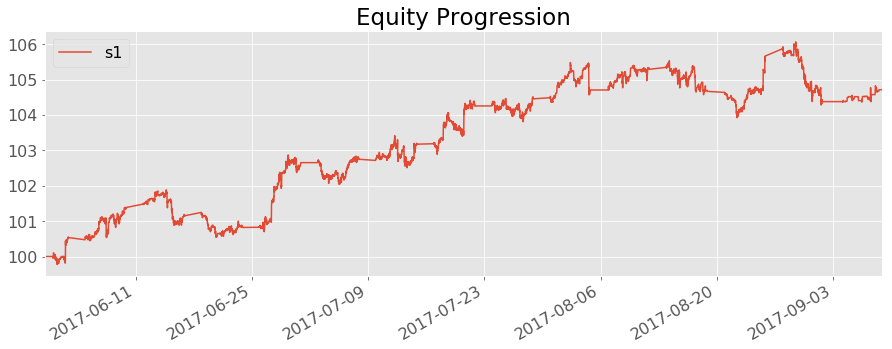

In [118]:
res.plot()

In [119]:
res.display()

Stat                 s1
-------------------  ----------
Start                2017-05-31
End                  2017-09-08
Risk-free rate       0.00%

Total Return         4.71%
Daily Sharpe         0.29
Daily Sortino        0.31
CAGR                 18.15%
Max Drawdown         -1.68%
Calmar Ratio         10.80

MTD                  -0.07%
3m                   3.51%
6m                   -
YTD                  4.71%
1Y                   -
3Y (ann.)            -
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  18.15%

Daily Sharpe         0.29
Daily Sortino        0.31
Daily Mean (ann.)    0.17%
Daily Vol (ann.)     0.58%
Daily Skew           0.58
Daily Kurt           32.00
Best Day             0.53%
Worst Day            -0.42%

Monthly Sharpe       2.88
Monthly Sortino      -
Monthly Mean (ann.)  13.98%
Monthly Vol (ann.)   4.86%
Monthly Skew         0.14
Monthly Kurt         -5.14
Best Month           2.65%
Worst Month          -0.07%

Yearly Sharpe        -
Yearly Sorti

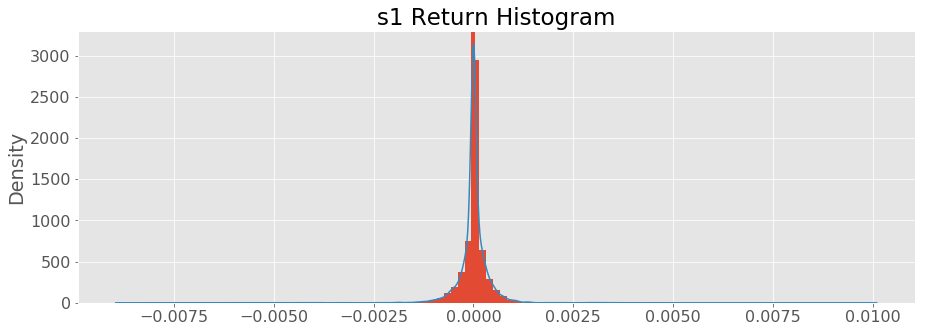

In [120]:
res.plot_histogram(bins=55)

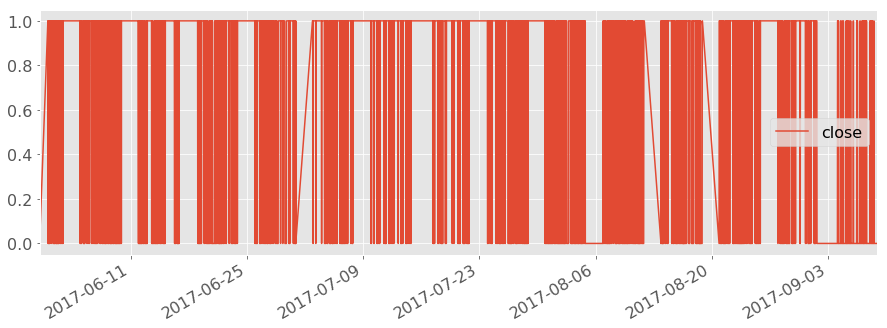

In [121]:
res.plot_security_weights()